## Import Libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data set

In [164]:
df = pd.read_csv("../raw/earthquick/raw_japan_earthquakes_1990-2023.csv")

## Check data quality

In [165]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1990-01-01T09:03:12.880Z,36.417,140.568,67.9,4.8,mb,NaN,NaN,NaN,1.2,...,2014-11-07T00:45:26.659Z,"3 km NE of Hitachi-Naka, Japan",earthquake,NaN,6.5,NaN,12.0,m,us,us
1,1990-01-03T08:53:38.930Z,35.457,141.272,10.0,4.3,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:45:27.933Z,"50 km SE of Hasaki, Japan",earthquake,NaN,NaN,NaN,1.0,reviewed,us,us
2,1990-01-04T12:16:38.380Z,36.342,141.408,55.1,4.4,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:45:28.402Z,"73 km ESE of Hitachi, Japan",earthquake,NaN,11.8,NaN,4.0,reviewed,us,us
3,1990-01-04T23:25:57.190Z,32.381,138.821,247.7,5.2,mw,NaN,NaN,NaN,0.9,...,2016-11-09T21:35:52.211Z,"252 km SSE of ?yama, Japan",earthquake,NaN,3.6,NaN,NaN,reviewed,us,hrv
4,1990-01-05T20:31:07.130Z,36.123,144.047,33.0,4.3,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:45:28.997Z,"293 km E of Hasaki, Japan",earthquake,NaN,NaN,NaN,1.0,reviewed,us,us


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33527 entries, 0 to 33526
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             33527 non-null  object 
 1   latitude         33527 non-null  float64
 2   longitude        33527 non-null  float64
 3   depth            33527 non-null  float64
 4   mag              33527 non-null  float64
 5   magType          33527 non-null  object 
 6   nst              19455 non-null  float64
 7   gap              25133 non-null  float64
 8   dmin             9962 non-null   float64
 9   rms              32674 non-null  float64
 10  net              33527 non-null  object 
 11  id               33527 non-null  object 
 12  updated          33527 non-null  object 
 13  place            33527 non-null  object 
 14  type             33527 non-null  object 
 15  horizontalError  8845 non-null   float64
 16  depthError       21370 non-null  float64
 17  magError    

In [167]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                14072
gap                 8394
dmin               23565
rms                  853
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    24682
depthError         12157
magError           23720
magNst              5040
status                 0
locationSource         0
magSource              0
dtype: int64

In [168]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,33527.000000,33527.000000,33527.000000,33527.000000,19455.000000,25133.000000,9962.000000,32674.000000,8845.000000,21370.000000,9807.00000,28487.000000
mean,34.844118,140.163940,76.251932,4.474592,65.048676,117.589969,1.962685,0.866479,7.405843,8.587769,0.12281,26.762734
std,4.944585,4.126058,113.820559,0.469764,89.571776,40.960233,1.459058,0.252365,2.356409,7.063718,0.07066,49.630849
min,24.000000,128.000000,0.000000,2.700000,4.000000,8.000000,0.038000,0.040000,1.400000,0.000000,0.02000,1.000000
25%,30.778750,139.358000,19.100000,4.200000,18.000000,95.000000,1.080000,0.700000,5.900000,4.500000,0.07100,4.000000
50%,35.782000,141.544700,35.000000,4.400000,32.000000,122.600000,1.782000,0.850000,7.200000,6.900000,0.10900,10.000000
75%,38.245300,142.624000,61.835500,4.700000,68.000000,136.100000,2.567000,1.020000,8.700000,10.500000,0.15900,26.000000
max,45.999000,145.996000,686.390000,9.100000,929.000000,353.400000,44.036000,1.940000,23.800000,72.700000,0.70000,796.000000


In [169]:
df.shape

(33527, 22)

## Check on charts

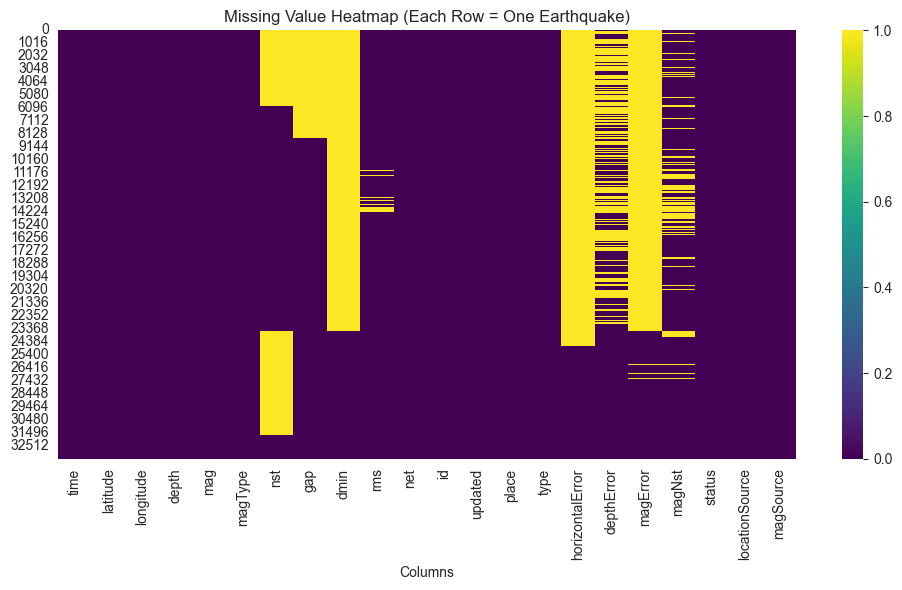

In [170]:
# Create a heatmap showing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Value Heatmap (Each Row = One Earthquake)')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

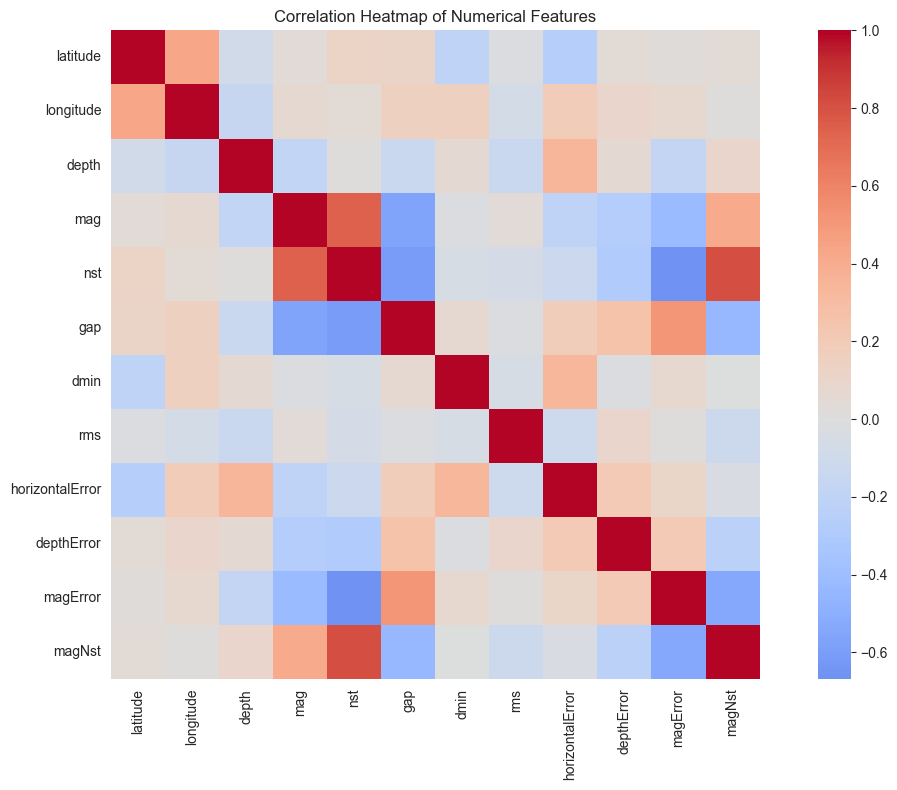

In [171]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

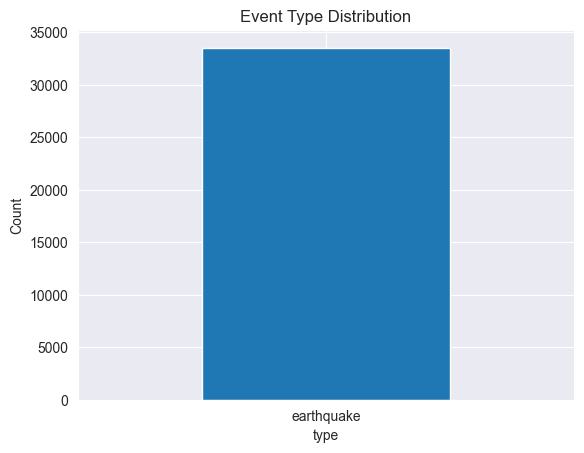

In [172]:
#Type column
df['type'].value_counts().plot(kind='bar', title='Event Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Drop irrelevant columns

In [173]:
# 42% > Dropped
cols_to_drop = [
    'id',
    'updated',
    'net',
    'place',
    'type',
    'status',
    'locationSource',
    'magSource',
    'dmin',
    'horizontalError',
    'magError'
]

In [174]:
df_clean = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [175]:
df_clean.isnull().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
nst           14072
gap            8394
rms             853
depthError    12157
magNst         5040
dtype: int64

In [176]:
df_clean.shape

(33527, 11)

## Convert time into month,day,hours

In [177]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['month'] = df_clean['time'].dt.month
df_clean['day'] = df_clean['time'].dt.day
df_clean['hour'] = df_clean['time'].dt.hour

In [178]:
df_clean.describe()

,latitude,longitude,depth,mag,nst,gap,rms,depthError,magNst,month,day,hour
count,33527.000000,33527.000000,33527.000000,33527.000000,19455.000000,25133.000000,32674.000000,21370.000000,28487.000000,33527.000000,33527.000000,33527.000000
mean,34.844118,140.163940,76.251932,4.474592,65.048676,117.589969,0.866479,8.587769,26.762734,6.379306,15.596206,11.623915
std,4.944585,4.126058,113.820559,0.469764,89.571776,40.960233,0.252365,7.063718,49.630849,3.414055,8.520020,6.931915
min,24.000000,128.000000,0.000000,2.700000,4.000000,8.000000,0.040000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,30.778750,139.358000,19.100000,4.200000,18.000000,95.000000,0.700000,4.500000,4.000000,3.000000,9.000000,6.000000
50%,35.782000,141.544700,35.000000,4.400000,32.000000,122.600000,0.850000,6.900000,10.000000,6.000000,15.000000,12.000000
75%,38.245300,142.624000,61.835500,4.700000,68.000000,136.100000,1.020000,10.500000,26.000000,9.000000,23.000000,18.000000
max,45.999000,145.996000,686.390000,9.100000,929.000000,353.400000,1.940000,72.700000,796.000000,12.000000,31.000000,23.000000


In [179]:
#Drop time after clean
df_clean = df_clean.drop(columns=['time'])

In [180]:
df_clean.head()

,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst,month,day,hour
0,36.417,140.568,67.9,4.8,mb,NaN,NaN,1.2,6.5,12.0,1,1,9
1,35.457,141.272,10.0,4.3,mb,NaN,NaN,1.1,NaN,1.0,1,3,8
2,36.342,141.408,55.1,4.4,mb,NaN,NaN,1.1,11.8,4.0,1,4,12
3,32.381,138.821,247.7,5.2,mw,NaN,NaN,0.9,3.6,NaN,1,4,23
4,36.123,144.047,33.0,4.3,mb,NaN,NaN,1.1,NaN,1.0,1,5,20


## Fill missing values - nst,gap,rms,magNst,depthError

In [181]:
df_clean.fillna({
    'nst': df_clean['nst'].median(),
    'gap': df_clean['gap'].median(),
    'rms': df_clean['rms'].median(),
    'depthError': df_clean['depthError'].median(),
    'magNst': df_clean['magNst'].median()
}, inplace=True)

In [182]:
df_clean.isnull().sum()

latitude      0
longitude     0
depth         0
mag           0
magType       0
nst           0
gap           0
rms           0
depthError    0
magNst        0
month         0
day           0
hour          0
dtype: int64

In [183]:
df_clean.describe()

,latitude,longitude,depth,mag,nst,gap,rms,depthError,magNst,month,day,hour
count,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000,33527.000000
mean,34.844118,140.163940,76.251932,4.474592,51.177439,118.844308,0.866059,7.975778,24.242849,6.379306,15.596206,11.623915
std,4.944585,4.126058,113.820559,0.469764,70.153811,35.530142,0.249147,5.697496,46.139071,3.414055,8.520020,6.931915
min,24.000000,128.000000,0.000000,2.700000,4.000000,8.000000,0.040000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,30.778750,139.358000,19.100000,4.200000,27.000000,108.000000,0.700000,5.900000,4.000000,3.000000,9.000000,6.000000
50%,35.782000,141.544700,35.000000,4.400000,32.000000,122.600000,0.850000,6.900000,10.000000,6.000000,15.000000,12.000000
75%,38.245300,142.624000,61.835500,4.700000,38.000000,134.000000,1.010000,8.100000,22.000000,9.000000,23.000000,18.000000
max,45.999000,145.996000,686.390000,9.100000,929.000000,353.400000,1.940000,72.700000,796.000000,12.000000,31.000000,23.000000


In [184]:
# Check at least any missing values
print(df_clean.isnull().sum().sum())

0


## Feature engineering

In [185]:
# Quake deep and shaky? This combo makes measurement harder
df_clean['depth_rms'] = df_clean['depth'] * df_clean['rms']

# Poor data quality if timing is shaky (rms) AND stations are uneven (gap)
df_clean['data_quality_index'] = df_clean['rms'] * df_clean['gap']

# depth_rms = 10.0 × 0.2 = 2.0           Low = reliable
# data_quality_index = 0.2 × 40 = 8.0    Low = high quality
#
# depth_rms = 120.0 × 1.8 = 216.0           High = unreliable
# data_quality_index = 1.8 × 160 = 288.0    Very high = poor quality

## One-hot encoding for magtype

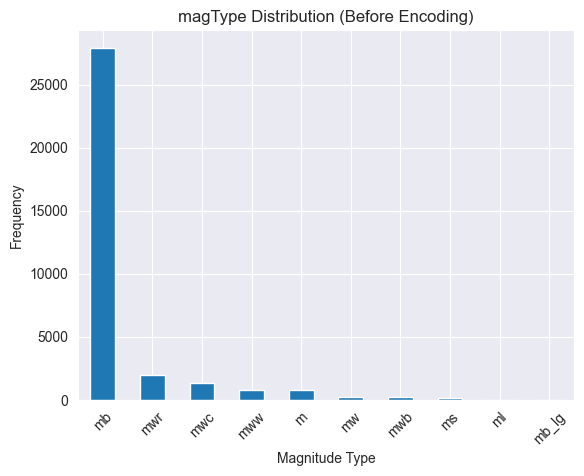

In [186]:

df['magType'].value_counts().plot(kind='bar', title='magType Distribution (Before Encoding)')
plt.xlabel('Magnitude Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [187]:
# Check unique values in 'magType'
print("Unique magType values:")
print(df_clean['magType'].value_counts())
print("\nTotal number of unique magTypes:", df_clean['magType'].nunique())

Unique magType values:
magType
mb       27911
mwr       1999
mwc       1338
mww        812
m          802
mw         265
mwb        255
ms         122
ml          22
mb_lg        1
Name: count, dtype: int64

Total number of unique magTypes: 10



After grouping into physical types:
magType
Mb    27911
M      5471
Ms      122
ML       23
Name: count, dtype: int64


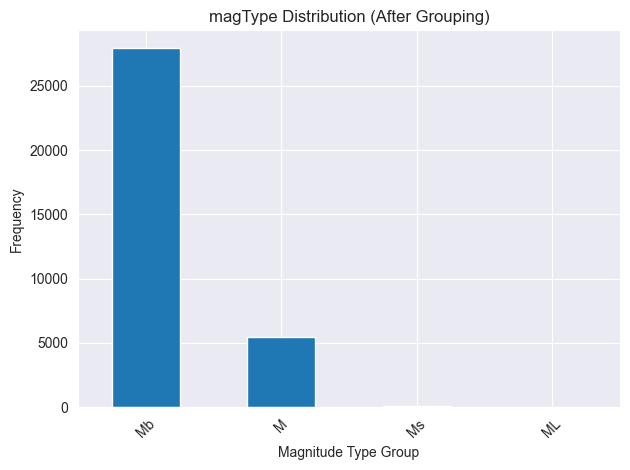

In [188]:
magtype_mapping = {
    # All Moment Magnitude variants (most accurate) → grouped as 'M'
    'mw': 'M',   # Standard moment magnitude
    'mwr': 'M',  # Moment tensor-derived
    'mwc': 'M',  # Centroid Moment Tensor
    'mww': 'M',  # W-phase Moment
    'mwb': 'M',  # Broadband Moment
    'm': 'M',    # Generic magnitude

    # Surface wave magnitude
    'ms': 'Ms',

    # Body wave magnitude
    'mb': 'Mb',

    # Local/regional magnitudes (less reliable for large quakes)
    'ml': 'ML',
    'mb_lg': 'ML'
}

# Apply mapping
df_clean['magType'] = df_clean['magType'].map(magtype_mapping).fillna('Other')

# Show grouped result
print("\nAfter grouping into physical types:")
print(df_clean['magType'].value_counts())

# Step 3: Plot distribution after grouping
df_clean['magType'].value_counts().plot(kind='bar', title='magType Distribution (After Grouping)')
plt.xlabel('Magnitude Type Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [189]:
#One-hot encode the magType column
df_clean = pd.get_dummies(
    df_clean,
    columns=['magType'],
    prefix='M',
    drop_first=True
)
# Bool to int (True -> 1, False -> 0)
mag_dummies = [col for col in df_clean.columns if col.startswith('M_')]
df_clean[mag_dummies] = df_clean[mag_dummies].astype(int)

In [190]:
# Verify the result
print(df_clean[mag_dummies].dtypes)
df_clean.head()

M_ML    int64
M_Mb    int64
M_Ms    int64
dtype: object


,latitude,longitude,depth,mag,nst,gap,rms,depthError,magNst,month,day,hour,depth_rms,data_quality_index,M_ML,M_Mb,M_Ms
0,36.417,140.568,67.9,4.8,32.0,122.6,1.2,6.5,12.0,1,1,9,81.48,147.12,0,1,0
1,35.457,141.272,10.0,4.3,32.0,122.6,1.1,6.9,1.0,1,3,8,11.00,134.86,0,1,0
2,36.342,141.408,55.1,4.4,32.0,122.6,1.1,11.8,4.0,1,4,12,60.61,134.86,0,1,0
3,32.381,138.821,247.7,5.2,32.0,122.6,0.9,3.6,10.0,1,4,23,222.93,110.34,0,0,0
4,36.123,144.047,33.0,4.3,32.0,122.6,1.1,6.9,1.0,1,5,20,36.30,134.86,0,1,0


In [191]:
df_clean.columns.tolist()

['latitude',
 'longitude',
 'depth',
 'mag',
 'nst',
 'gap',
 'rms',
 'depthError',
 'magNst',
 'month',
 'day',
 'hour',
 'depth_rms',
 'data_quality_index',
 'M_ML',
 'M_Mb',
 'M_Ms']

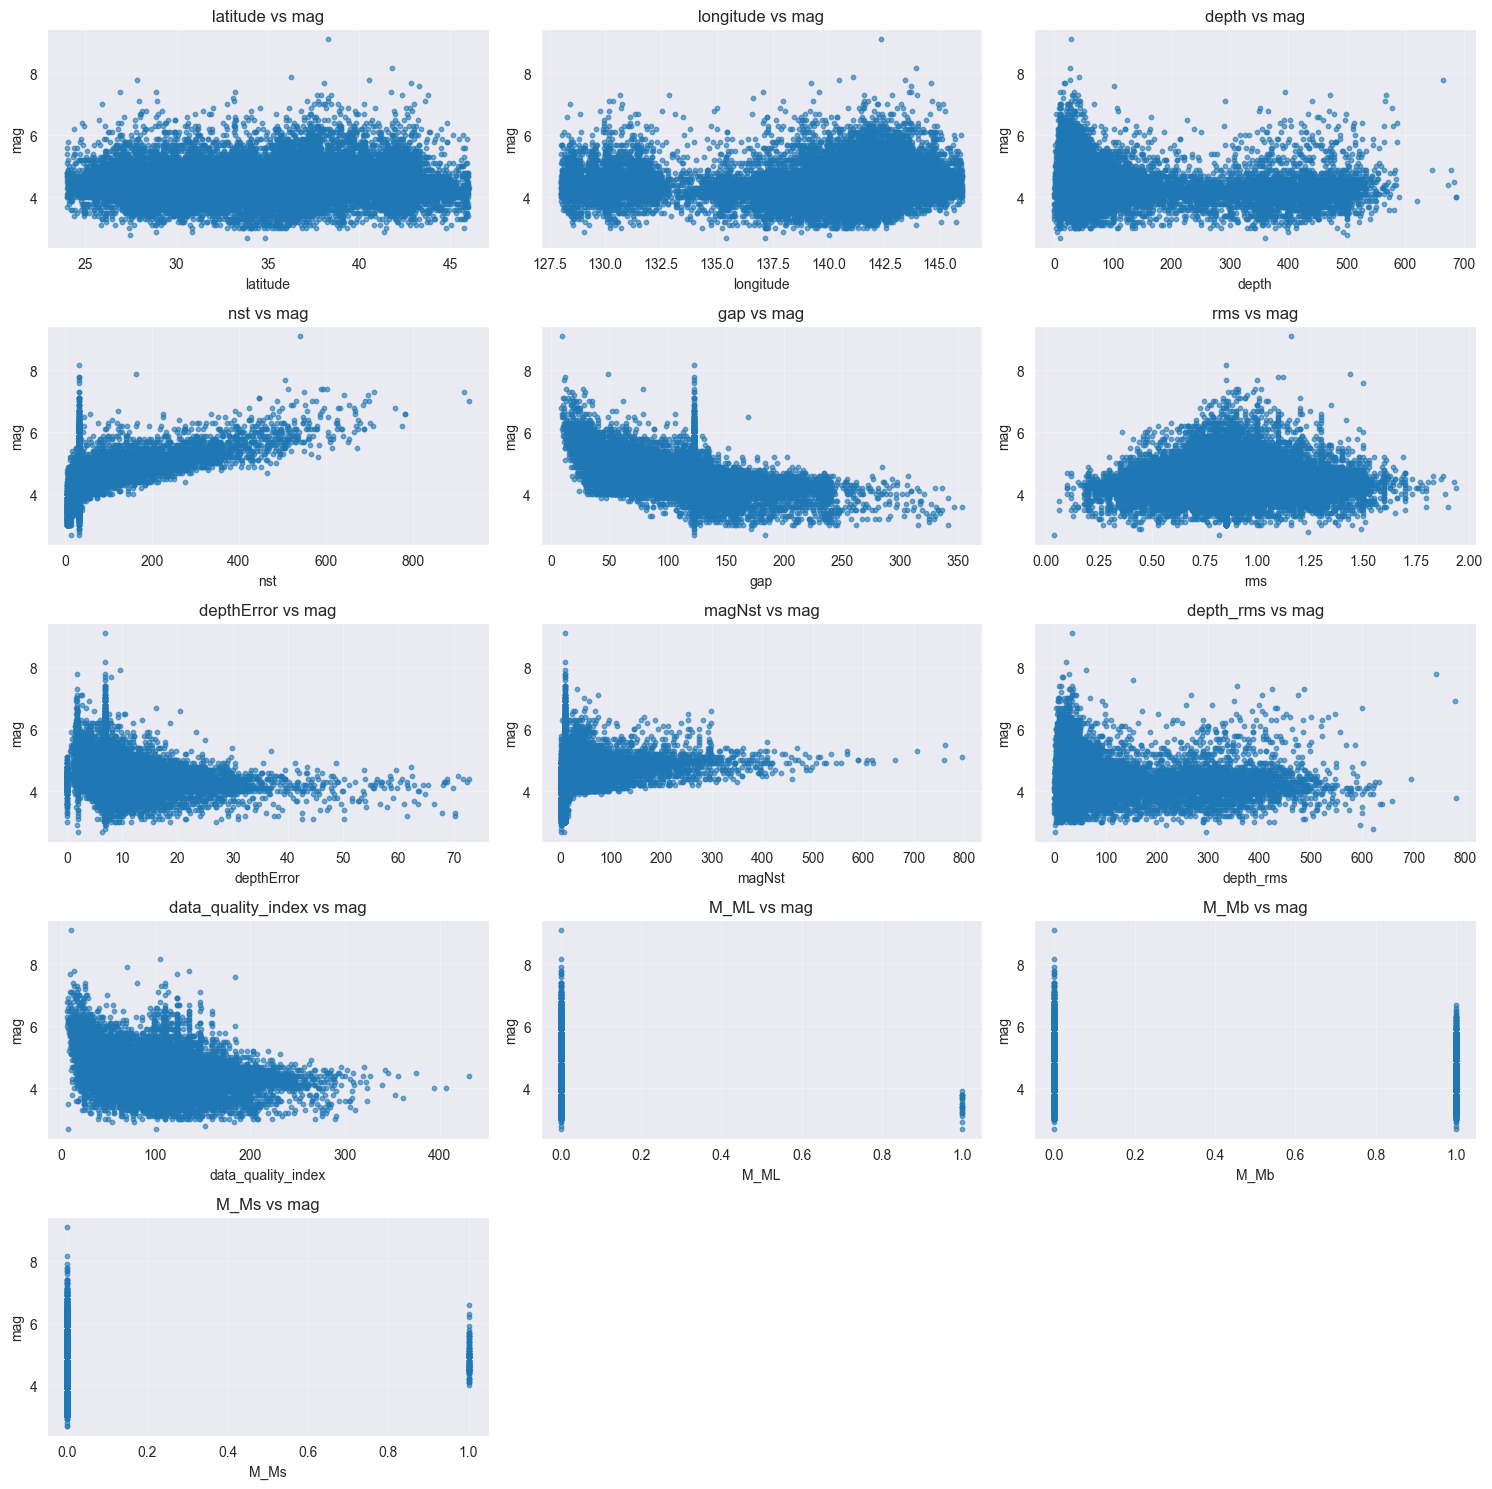

In [192]:
import math

# Scatter Plots: Features vs Target ('mag)
# Define target and get numerical features
target = 'mag'
numerical_features = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove(target)

# Create scatter plots
plt.figure(figsize=(15, 3 * math.ceil(len(numerical_features) / 3)))

for i, col in enumerate(numerical_features):
    plt.subplot(math.ceil(len(numerical_features) / 3), 3, i + 1)
    plt.scatter(df_clean[col], df_clean[target], alpha=0.6, s=10)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'{col} vs {target}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Save Clean data set

In [193]:
df_clean.to_csv('earthquake_japan_cleaned.csv', index=False)